# Stochastic Gradient Descent and Back Propagation

## Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Example 1

Let's focus on very simple function. For example 
$$ f(x) = x^{2} + 1 $$

The derivative of this function is:
$$ f'(x) = 2x $$

The extreme (minimum) of the function f(x) is in $x_{0}=1$, because the solution of equation $f'(x)=0$ is in point $x=0$. Then we can find the extreme of the function in $x=0$.
$$ f(0) = 1 $$

But what if we have more sophisticated function and we can calculate derivative but finding local/global minimum is very difficult. Then we can use Stochastic Gradient Descent. Let's try to write the function which will calculate it.

In [2]:
def f(x): 
    return x**2 + 1

def grad_f(x):
    return 2*x

In [3]:
x = np.arange(-2, 2.05, 0.05)
y = f(x)
grad = grad_f(x)

sample_data = pd.DataFrame({'x':x, 'y':y, 'grad_f':grad})

In [4]:
sample_data.head()

,x,y,grad_f
0,-2.00,5.0000,-4.0
1,-1.95,4.8025,-3.9
2,-1.90,4.6100,-3.8
3,-1.85,4.4225,-3.7
4,-1.80,4.2400,-3.6


In [5]:
from plotnine import ggplot, geom_line, aes, theme_bw, labs, geom_point

base_plot=(
    ggplot(sample_data, aes(x='x', y='y'))
    + geom_line(color='red')
    + geom_line(aes(y='grad_f'), color='blue')
    + theme_bw()
    + labs(x='x', y = 'y')
)


## Gradient Descent

In [58]:
x0 = 1.345
lr = 0.1
epochs = 30

def GD_ordinary_fun(f, grad_f, x0, lr, epochs):
    x=x0
    results=pd.DataFrame({'x':[x], 'y':[f(x)], 'grad_f':[grad_f(x)]})
    for i in range(epochs):
        x=x - lr*grad_f(x)
        results=results.append({'x':x, 'y':f(x), 'grad_f':grad_f(x)}, ignore_index=True)
        print("Updated x value: {}. Updated f(x) value: {}".format(np.round(x, 8), np.round(f(x), 8)))
    return results

def plot(data, data_grad):
    base_plot = (
        ggplot(data, aes(x='x', y='y'))
        + geom_line(color='red')
        + geom_line(aes(y='grad_f'), color='blue')
        + theme_bw()
        + labs(x='x', y = 'y')
    )
    p = (
        + geom_point(data=data_grad, color='black')
    )
    return p

In [43]:
task1=GD_ordinary_fun(f, grad_f, x0, lr, epochs)

Updated x value: 1.076. Updated f(x) value: 2.157776
Updated x value: 0.8608. Updated f(x) value: 1.74097664
Updated x value: 0.68864. Updated f(x) value: 1.47422505
Updated x value: 0.550912. Updated f(x) value: 1.30350403
Updated x value: 0.4407296. Updated f(x) value: 1.19424258
Updated x value: 0.35258368. Updated f(x) value: 1.12431525
Updated x value: 0.28206694. Updated f(x) value: 1.07956176
Updated x value: 0.22565356. Updated f(x) value: 1.05091953
Updated x value: 0.18052284. Updated f(x) value: 1.0325885
Updated x value: 0.14441828. Updated f(x) value: 1.02085664
Updated x value: 0.11553462. Updated f(x) value: 1.01334825
Updated x value: 0.0924277. Updated f(x) value: 1.00854288
Updated x value: 0.07394216. Updated f(x) value: 1.00546744
Updated x value: 0.05915373. Updated f(x) value: 1.00349916
Updated x value: 0.04732298. Updated f(x) value: 1.00223946
Updated x value: 0.03785838. Updated f(x) value: 1.00143326
Updated x value: 0.03028671. Updated f(x) value: 1.00091728

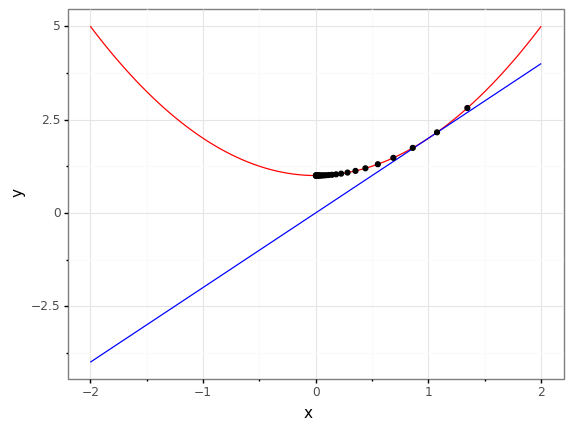

<ggplot: (-9223371922876822005)>

In [45]:
plot(sample_data, task1)

Above we sole the realy easy problem for function with one parameter. What if we try to do this for a function with multiple variables ? We can try to use gradient descent in one of the more commonly problem - linear regression.

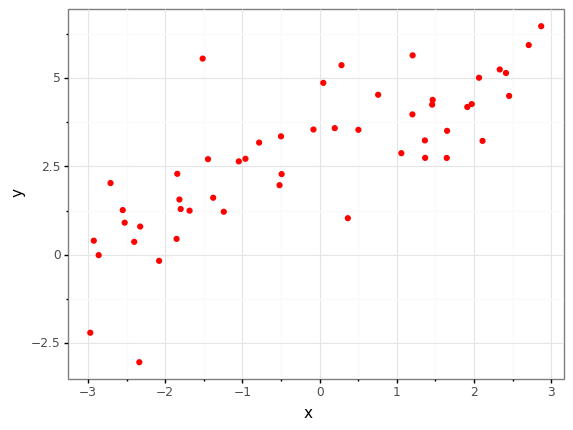

<ggplot: (113982006483)>

In [64]:
np.random.seed(666)

x = np.random.uniform(-3, 3, 50)
y = x + np.random.normal(3, 1.2, 50)
sample_data = pd.DataFrame({'x':x, 'y':y})

base_plot = (
        ggplot(sample_data, aes(x='x', y='y'))
        + geom_point(color='red')
        + theme_bw()
        + labs(x='x', y = 'y')
)
base_plot

Our aim is to find optimal parameters $\beta_{0}$ and $\beta_{1}$ of the linear regression mofel $y = \beta_{0} + \beta_{1}x$. For check our solution we will calculate MSE (Mean Squared Error) in each iteration. The best model is the model where the MSE in minimized so our target is to minimized MSE error. Before calculate optimal parameters own let's find this parameters using sklearn module.

In [78]:
np.array(sample_data['y'])

array([ 3.97651347,  5.01533271,  2.87733572,  2.74441023,  5.94193636,
        0.3969064 ,  1.96975775,  2.03015883,  0.36400405,  4.870172  ,
        1.2941515 ,  4.38813542,  2.29246011,  5.64997772,  1.21787975,
        2.74194091, -2.21197354,  0.79759877, -3.04812268,  5.55822951,
       -0.01258474,  3.23937061,  2.71884   ,  1.56409593,  4.50021086,
        6.47617277,  3.58660422,  2.70776945,  3.5391981 ,  2.64540722,
        5.24949144,  4.53302091,  4.18653391,  5.37117384,  3.35407702,
        4.2535031 ,  3.17773431,  1.26430537,  3.51064356,  1.24796351,
        0.90746568,  3.54821792, -0.17470737,  4.26885164,  0.44750296,
        1.61383577,  1.0346466 ,  5.15003961,  3.2261089 ,  2.28497144])

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  as mse

X = np.array(sample_data.x).reshape(-1, 1)
y = np.array(sample_data.y).reshape(-1, 1)
lm_model = LinearRegression(fit_intercept=True)
lm_model.fit(X, y)
y_pred = lm_model.predict(X)

In [115]:
print("y = {} + {}x".format(
    np.round(lm_model.intercept_[0],4), 
    np.round(lm_model.coef_[0][0], 4))
     )

y = 2.9291 + 0.8878x


In [119]:
print("Mean Squared Error = {}".format(np.round(mse(y, y_pred), 3)))

Mean Squared Error = 1.553


Right now we will try to find similar solution using ourself gradient descent. 

In [220]:
X = pd.DataFrame({'x0':1, 'x1':sample_data.x})
X.head()

,x0,x1
0,1,1.202623
1,1,2.065120
2,1,1.059086
3,1,1.367148
4,1,2.708748


In [221]:
X = np.array(X).reshape(2, 50)
y = np.array(sample_data.y).reshape(-1, 2)

In [222]:
X

array([[ 1.        ,  1.20262273,  1.        ,  2.06511986,  1.        ,
         1.05908602,  1.        ,  1.36714834,  1.        ,  2.70874774,
         1.        , -2.92378082,  1.        , -0.51847381,  1.        ,
        -2.70712324,  1.        , -2.40042863,  1.        ,  0.04839783,
         1.        , -1.79851476,  1.        ,  1.46492501,  1.        ,
        -1.84264798,  1.        ,  1.20506851,  1.        , -1.24063136,
         1.        ,  1.64687673,  1.        , -2.96934697,  1.        ,
        -2.32285408,  1.        , -2.33427797,  1.        , -1.51399063,
         1.        , -2.8605822 ,  1.        ,  1.36392693,  1.        ,
        -0.95979035,  1.        , -1.81498106,  1.        ,  2.45507756],
       [ 1.        ,  2.87008191,  1.        ,  0.19681526,  1.        ,
        -1.4452089 ,  1.        ,  0.50287571,  1.        , -1.04585608,
         1.        ,  2.33339588,  1.        ,  0.75842716,  1.        ,
         1.91324214,  1.        ,  0.28407252,  1.

In [ ]:
def MSE(beta, X, y):
    y_pred = np.dot(beta,X)
    return result


In [210]:
b=np.array([0.1, 0.2]).reshape(1, 2)

In [223]:
np.dot(b, X)

array([[ 0.3       ,  0.69427866,  0.3       ,  0.24587504,  0.3       ,
        -0.18313318,  0.3       ,  0.23728998,  0.3       ,  0.06170356,
         0.3       ,  0.17430109,  0.3       ,  0.09983805,  0.3       ,
         0.1119361 ,  0.3       , -0.18322836,  0.3       , -0.09510581,
         0.3       ,  0.11180515,  0.3       , -0.00999184,  0.3       ,
        -0.69406495,  0.3       ,  0.45073843,  0.3       , -0.46077204,
         0.3       , -0.34010178,  0.3       , -0.31279807,  0.3       ,
        -0.64787673,  0.3       ,  0.16073036,  0.3       , -0.52175678,
         0.3       , -0.56156748,  0.3       ,  0.209634  ,  0.3       ,
         0.38687743,  0.3       ,  0.2406479 ,  0.3       ,  0.14720611]])

In [203]:
np.array([0.1, 0.2]).reshape(1, 2)

array([[0.1, 0.2]])

In [204]:
X

array([[ 1.        ,  1.20262273],
       [ 1.        ,  2.06511986],
       [ 1.        ,  1.05908602],
       [ 1.        ,  1.36714834],
       [ 1.        ,  2.70874774],
       [ 1.        , -2.92378082],
       [ 1.        , -0.51847381],
       [ 1.        , -2.70712324],
       [ 1.        , -2.40042863],
       [ 1.        ,  0.04839783],
       [ 1.        , -1.79851476],
       [ 1.        ,  1.46492501],
       [ 1.        , -1.84264798],
       [ 1.        ,  1.20506851],
       [ 1.        , -1.24063136],
       [ 1.        ,  1.64687673],
       [ 1.        , -2.96934697],
       [ 1.        , -2.32285408],
       [ 1.        , -2.33427797],
       [ 1.        , -1.51399063],
       [ 1.        , -2.8605822 ],
       [ 1.        ,  1.36392693],
       [ 1.        , -0.95979035],
       [ 1.        , -1.81498106],
       [ 1.        ,  2.45507756],
       [ 1.        ,  2.87008191],
       [ 1.        ,  0.19681526],
       [ 1.        , -1.4452089 ],
       [ 1.        ,